<p style="font-size:300%; background-color:gray; color:white; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 1. Interpolación y rotación de Imagenes</p>
<p style="font-size:240%; background-color:gray; color:white; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jefferson Javier Hernández Panqueba</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jejhernandezpa@unal.edu.co</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
<br>Jaime Andrés Castillo León</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email:jacastillol@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>3 de marzo de 2018</p>

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Contenido </h1>

<ol style="font-size:120%; line-height : 35px;">
    <li><h3>Implementar, en OpenCV, tres de los filtros para reducción de ruido speckle vistos en clase</h3></li>
    <li><h3>Implementar, en OpenCV, cinco de las técnicas de estimación de nivel de ruido vistas en clase</h3></li>
    <li><h3>Evaluar el desempeño de los filtros implementados (estimar el nivel de ruido antes y después de filtradas) al ser aplicados sobre imágenes reales y sintéticas (creadas artificialmente), con diferences niveles de ruido multiplicativo</h3></li>
    <li>
        <h3>Implemente, como una función de OpenCV, los filtros Chebyshev Tipo I: pasa-bajo, pasa-alto y pasa-banda</h3>
    </li>
    <li>
        <h3>Con imágenes sintéticas y reales, evaluar las técnicas de realce de imágenes, tanto en el dominio espacial como en el dominio frecuencial</h3>
    </li>
</ol>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2

from scipy.ndimage.filters import uniform_filter as boxcar

In [2]:
import os

syntetic_image_dir = 'tarea04/img/syntetic'
real_image_dir = 'tarea04/img/real'

syntetic_images_paths = list(map(lambda x: syntetic_image_dir + '/' + x, os.listdir(syntetic_image_dir)))
real_images_paths = list(map(lambda x: real_image_dir + '/' + x, os.listdir(real_image_dir)))

print(syntetic_images_paths, real_images_paths)

['tarea04/img/syntetic/cv5.png', 'tarea04/img/syntetic/cv1.png', 'tarea04/img/syntetic/cv3.png', 'tarea04/img/syntetic/cv2.png', 'tarea04/img/syntetic/cv7.png', 'tarea04/img/syntetic/cv6.png', 'tarea04/img/syntetic/cv4.png'] ['tarea04/img/real/img2.png', 'tarea04/img/real/img.png', 'tarea04/img/real/img3.png']


# Punto 1

In [3]:
# funciones de utilidad (tomadas de pyradar)

def assert_window_size(win_size):
    """
    Asserts invalid window size.
    Window size must be odd and bigger than 3.
    """
    assert win_size >= 3, 'ERROR: win size must be at least 3'

    if win_size % 2 == 0:
        print('It is highly recommended to user odd window sizes.'\
              'You provided %s, an even number.' % (win_size, ))


def assert_indices_in_range(width, height, xleft, xright, yup, ydown):
    """
    Asserts index out of image range.
    """
    assert xleft >= 0 and xleft <= width, \
        "index xleft:%s out of range (%s<= xleft < %s)" % (xleft, 0, width)

    assert xright >= 0 and xright <= width, \
        "index xright:%s out of range (%s<= xright < %s)" % (xright, 0, width)

    assert yup >= 0 and yup <= height, \
        "index yup:%s out of range. (%s<= yup < %s)" % (yup, 0, height)

    assert ydown >= 0 and ydown <= height, \
        "index ydown:%s out of range. (%s<= ydown < %s)" % (ydown, 0, height)

In [4]:
# filtro de lee (tomado de: https://github.com/reptillicus/LeeFilter/blob/master/LeeFilter.pyx)
def lee_filter(image, N=7, sigma=5, mode='reflext'):
    delta = (N - 1) / 2
    rows, cols = image.shape
    
    mean = boxcar(image, (N, N), mode=mode)
    z = np.zeros((rows, cols), dtype=double)
    
    for nc in range(delta, cols - delta):
        for nr in range(delta, rows - delta):
            z[nr, nc] = np.sum((Array[nr - Delta:nr + Delta, nc - Delta:nc + Delta] - mean[nr,nc])**2)
    
    z /= (N ** 2 - 1)
    
    variance_x = (z + mean**2) /(sigma**2 + 1.0) - mean**2
    
    return mean + (Array - mean) * ( variance_x/(mean**2 * sigma**2 + variance_x) )

# filtro de frost (tomado de pyradar)

COEF_VAR_DEFAULT = 0.01

def compute_coef_var(image, x_start, x_end, y_start, y_end):
    """
    Compute coefficient of variation in a window of [x_start: x_end] and
    [y_start:y_end] within the image.
    """
    assert x_start >= 0, 'ERROR: x_start must be >= 0.'
    assert y_start >= 0, 'ERROR: y_start must be >= 0.'

    x_size, y_size = image.shape
    x_overflow = x_end > x_size
    y_overflow = y_end > y_size

    assert not x_overflow, 'ERROR: invalid parameters cause x window overflow.'
    assert not y_overflow, 'ERROR: invalid parameters cause y window overflow.'

    window = image[x_start:x_end, y_start:y_end]

    coef_var = variation(window, None)

    if not coef_var:  # dirty patch
        coef_var = COEF_VAR_DEFAULT
#        print "squared_coef was equal zero but replaced by %s" % coef_var
    assert coef_var > 0, 'ERROR: coeffient of variation cannot be zero.'

    return coef_var


def calculate_all_Mi(window_flat, factor_A, window):
    """
    Compute all the weights of pixels in the window.
    """
    N, M = window.shape
    center_pixel = np.float64(window[N / 2, M / 2])
    window_flat = np.float64(window_flat)

    distances = np.abs(window_flat - center_pixel)

    weights = np.exp(-factor_A * distances)

    return weights


def calculate_local_weight_matrix(window, factor_A):
    """
    Returns an array with the weights for the pixels in the given window.
    """
    weights_array = np.zeros(window.size)
    window_flat = window.flatten()

    weights_array = calculate_all_Mi(window_flat, factor_A, window)

    return weights_array


def frost_filter(img, damping_factor=2.0, win_size=3):
    """
    Apply frost filter to a numpy matrix containing the image, with a window of
    win_size x win_size.
    By default, the window size is 3x3.
    """

    assert_window_size(win_size)

    img_filtered = np.zeros_like(img)
    N, M = img.shape
    win_offset = win_size / 2

    for i in xrange(0, N):
        xleft = i - win_offset
        xright = i + win_offset
        if xleft < 0:
            xleft = 0
        if xright >= N:
            xright = N - 1
        for j in xrange(0, M):
            yup = j - win_offset
            ydown = j + win_offset
            if yup < 0:
                yup = 0
            if ydown >= M:
                ydown = M - 1

            assert_indices_in_range(N, M, xleft, xright, yup, ydown)

            # inspired by http://www.pcigeomatics.com/cgi-bin/pcihlp/FFROST
            variation_coef = compute_coef_var(img, xleft, xright, yup, ydown)
            window = img[xleft:xright, yup:ydown]
            window_mean = window.mean()
            sigma_zero = variation_coef / window_mean  # var / u^2
            factor_A = damping_factor * sigma_zero

            weights_array = calculate_local_weight_matrix(window, factor_A)
            pixels_array = window.flatten()

            weighted_values = weights_array * pixels_array
            img_filtered[i, j] = weighted_values.sum() / weights_array.sum()

    return img_filtered

# kuan filter (tomado de pyradar)

CU_DEFAULT = 0.25


def weighting(window, cu=CU_DEFAULT):
    """
    Computes the weighthing function for Kuan filter using cu as the noise
    coefficient.
    """
    two_cu = cu * cu

    ci = variation(window, None)
    two_ci = ci * ci

    if not two_ci:  # dirty patch to avoid zero division
        two_ci = COEF_VAR_DEFAULT

    divisor = 1.0 + two_cu

    if not divisor:
        divisor = 0.0001

    if cu > ci:
        w_t = 0.0
    else:
        w_t = (1.0 - (two_cu / two_ci)) / divisor

    return w_t


def kuan_filter(img, win_size=3, cu=CU_DEFAULT):
    """
    Apply kuan to a numpy matrix containing the image, with a window of
    win_size x win_size.
    """

    assert_window_size(win_size)

    # we process the entire img as float64 to avoid type overflow error
    img = np.float64(img)
    img_filtered = np.zeros_like(img)

    N, M = img.shape
    win_offset = win_size / 2

    for i in xrange(0, N):
        xleft = i - win_offset
        xright = i + win_offset

        if xleft < 0:
            xleft = 0
        if xright >= N:
            xright = N

        for j in xrange(0, M):
            yup = j - win_offset
            ydown = j + win_offset

            if yup < 0:
                yup = 0
            if ydown >= M:
                ydown = M

            assert_indices_in_range(N, M, xleft, xright, yup, ydown)

            pix_value = img[i, j]
            window = img[xleft:xright, yup:ydown]
            w_t = weighting(window, cu)
            window_mean = window.mean()
            new_pix_value = (pix_value * w_t) + (window_mean * (1.0 - w_t))

            img_filtered[i, j] = round(new_pix_value)

    return img_filtered

# Punto 2

In [5]:
# Signal to noise ratio (inspirado de https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.signaltonoise.html)
def SNR(img):
    mean = img.mean(axis=None)
    std = img.std(axis=None, ddof=0)
    return np.where(std == 0, 0, mean / std)

# Speckle Suppression Index
def SSI(original_image, filtered_image):
    mean_original = original_image.mean(axis=None)
    std_original = original_image.std(axis=None, ddof=0)
    mean_filtered = filtered_image.mean(axis=None)
    std_filtered = filtered_image.std(axis=None, ddof=0)
    
    return (std_filtered / mean_filtered) * (mean_original / std_original)

# Speckle Suppression and Mean Preservation Index
def SMPI(original_image, filtered_image):
    M_0 = 1 + (original_image.mean(axis=None) - filtered_image.mean(axis=None))
    return M_0 * (filtered_image.std(axis=None, ddof=0) / original_image.std(axis=None, ddof=0))

"""from scipy.ndimage import correlate
from scipy.linalg import toeplitz
from scipy.stats import gamma

def directder(H, rps, cps):
    V = np.full((1,rps*cps), H)
    return toeplitz(V)

def NLEstimate(I, ps=7, maxiter=5):

    # This function estimate noise level in an Image as specified in paper
# entitled as Single-Image Noise Level Estimation for Blind Denoising by 
# Xinhao Liu, Masayuki Tanaka, and Masatoshi Okutomi.
    
    # INPUTS:
#           I = Image
#           ps = Patch Size (Optional); default size in 7
#           maxiter = Number of iteration (Optional); default value is 5
# OUTPUTS:
#           ENL = Estimated Noise Level Can be a single value if I is 
#                 grayscale image or v ector of 1 X 3 dimension if I is 
#                 RGB image representing  in red, green and blue chan
    
    # Implementation starts here
    
    delta = 0.999
    kh = np.array([-1/2, 0, 1/2])
    # Horizontal Derivative
    Ih = correlate(I,kh, mode='replicate').transpose()
    # Cropping to handle borders of each patch correctly
    Ih = Ih[:, 2:Ih.shape[1] - 1,:]
    # Vertical Derivative
    Iv=correlate(I, kh.T, mode='replicate').transpose()
    # Cropping to handle borders of each patch correctly
    Iv=Iv[2:Iv.shape[0] - 1,:,:]
    # ------------------- Directional Derivative Operator ------------------- #
    # Please refer to reference [3], [1]
    Dh=directder(kh, ps, ps)
    
    Dv=directder(kh.T, ps, ps)
    
    # ----------------------- Threshold Calculation ------------------------- #
    # Evaluating trace of Gradient Matrix
    D = np.trace(np.dot(Dh.T,Dh) + np.dot(Dv.T,Dv))
    # Intermediate variables
    alfa = (np.dot(ps,ps)) / 2
    beta = D / alfa
    # Computing threshold from Inverse gamma function
    tau0 = gamma.ppf(delta, alfa, beta)
    # Preallcoating Noise Level array for three iamge channel
    ENL = np.zeros((1,I.shape[2]))
    sigma = np.zeros((1,maxiter))
    for chan in arange(1,size(I,3)).reshape(-1):
        # Selecting particular channel (from red, green, and blue) of image,
        # and converting entire image into vector of specified patch size
        X=im2col(I[:,:,chan],cat(ps,ps))
        Xh=im2col(Ih[:,:,chan],cat(ps,ps - 2))
        Xv=im2col(Iv[:,:,chan],cat(ps - 2,ps))
        Xtr=sum(vertcat(Xh,Xv))
        # Computing Covariance Matrix
        C=(dot(X,X.T)) / (size(X,2) - 1)
        EV=eig(C)
        sigma[1]=EV[1]
        for k in arange(2,maxiter).reshape(-1):
            # Updating threshold equation 18 of [3]
            tau=dot(sigma[k - 1],tau0)
            # refer to section III.A equation no. 17 from [3]
            p=(Xtr < tau)
            Xtr=Xtr[:,p]
            WTP=X[:,p]
            # Covariance Matrix
            CWTP=(dot(WTP,WTP.T)) / (size(WTP,2) - 1)
            EVWTP=eig(CWTP)
            # initial value
            sigma[k]=EVWTP[1]
            if abs(sigma[k] - sigma[k - 1]) <= 0.0001:
                sig=sigma[k]
                break
        # Estimated Noise Level
        ENL[chan]=sqrt(sig)
"""


"from scipy.ndimage import correlate\nfrom scipy.linalg import toeplitz\nfrom scipy.stats import gamma\n\ndef directder(H, rps, cps):\n    V = np.full((1,rps*cps), H)\n    return toeplitz(V)\n\ndef NLEstimate(I, ps=7, maxiter=5):\n\n    # This function estimate noise level in an Image as specified in paper\n# entitled as Single-Image Noise Level Estimation for Blind Denoising by \n# Xinhao Liu, Masayuki Tanaka, and Masatoshi Okutomi.\n    \n    # INPUTS:\n#           I = Image\n#           ps = Patch Size (Optional); default size in 7\n#           maxiter = Number of iteration (Optional); default value is 5\n# OUTPUTS:\n#           ENL = Estimated Noise Level Can be a single value if I is \n#                 grayscale image or v ector of 1 X 3 dimension if I is \n#                 RGB image representing  in red, green and blue chan\n    \n    # Implementation starts here\n    \n    delta = 0.999\n    kh = np.array([-1/2, 0, 1/2])\n    # Horizontal Derivative\n    Ih = correlate(I,kh, m

# Punto 4

Chebyshev low pass filter


/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


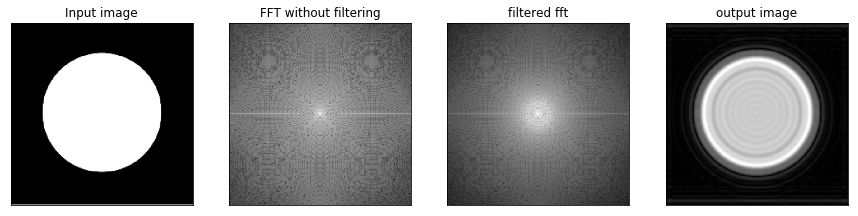

Chebyshev high pass filter


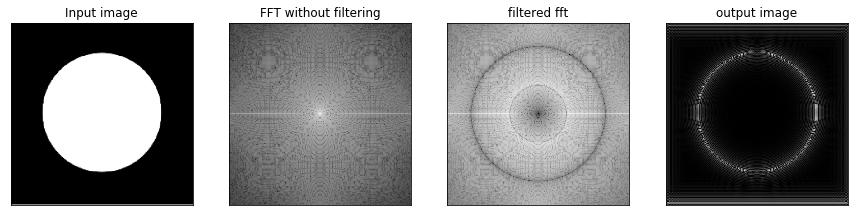

Chebyshev band pass filter


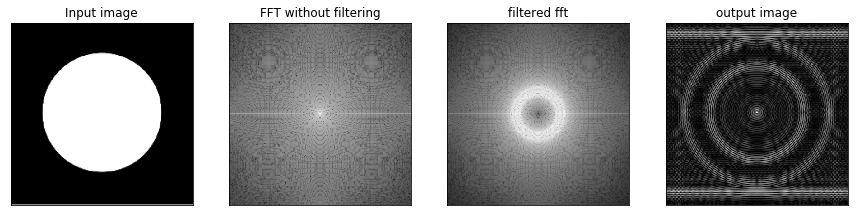

In [9]:
# función de utilidad

from scipy import fftpack
from scipy import signal
from scipy.spatial.distance import euclidean

def show_img(img, ax, title, apply):
    ax.set_title(title)
    ax.imshow(apply(img), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

def filter_show(img, filter=lambda r, d_0: 1):
    
    fig, axes = plt.subplots(nrows=1, ncols=4, squeeze=False, figsize=(15, 15))
    show_img(img, axes[0, 0], "Input image", lambda x: x)
    
    spec = fftpack.fft2(img)
    centered = fftpack.fftshift(spec)
    show_img(centered, axes[0, 1], "FFT without filtering", lambda x: np.log10(abs(x)))
    
    rows, cols = centered.shape
    H = np.zeros(centered.shape)
    row_center = rows / 2
    col_center = cols / 2
    for i in range(1, rows):
        for j in range(1, cols):
            r = euclidean([i, j], [row_center, col_center])
            H[i, j] = filter(r)
    convolve = centered * H
    show_img(convolve, axes[0, 2], "filtered fft", lambda x: np.log10(abs(x)))
    
    output_img = abs(fftpack.ifft2(fftpack.ifftshift(convolve)))
    show_img(output_img, axes[0, 3], "output image", lambda x: x)
    plt.show()
    
def chebyshev_filter(img, d_0=30, mode='lowpass'):
    b, a = signal.cheby1(4, 5, Wn=d_0, btype=mode, analog=True)
    filter = lambda dist: signal.freqs(b, a, worN=[dist])[1][0]
    filter_show(img, filter=filter)
    
img = cv2.imread(syntetic_images_paths[0], 0)
print("Chebyshev low pass filter")
chebyshev_filter(img)
print("Chebyshev high pass filter")
chebyshev_filter(img, d_0=60, mode='highpass')
print("Chebyshev band pass filter")
chebyshev_filter(img, d_0=[40, 60], mode='bandpass')

# Punto 5

Filtro laplaciano en imagenes sinteticas


'\nfor mode, d_0 in zip(modes, params):\n    for file in syntetic_images_paths:\n        img = cv2.imread(file, 0)\n        #ideal_filter(img, d_0=d_0, mode=mode)\n        laplacian_filter(img)'

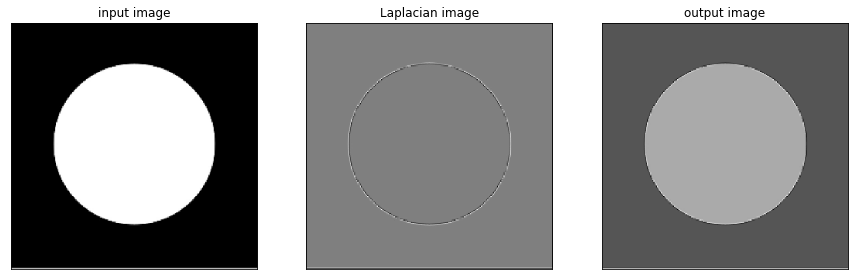

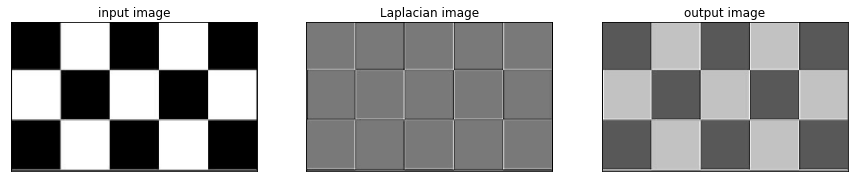

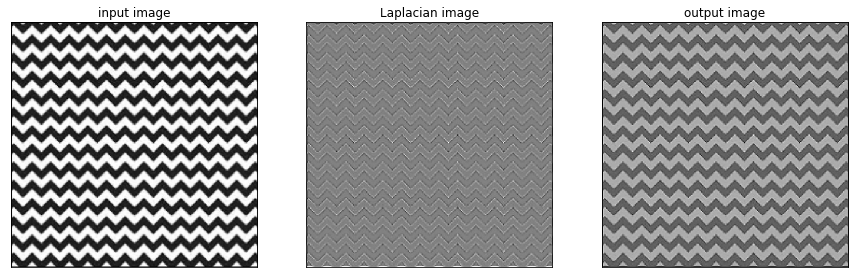

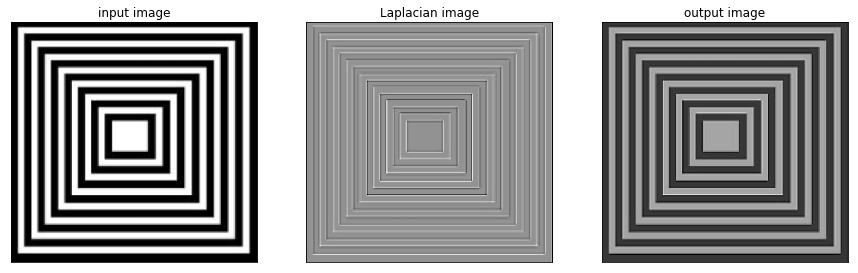

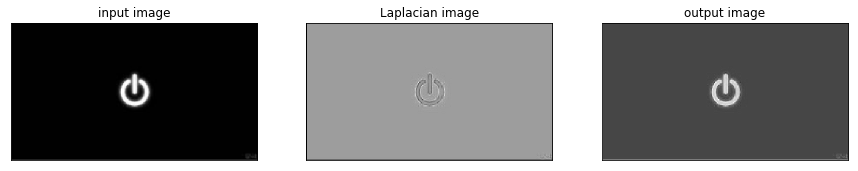

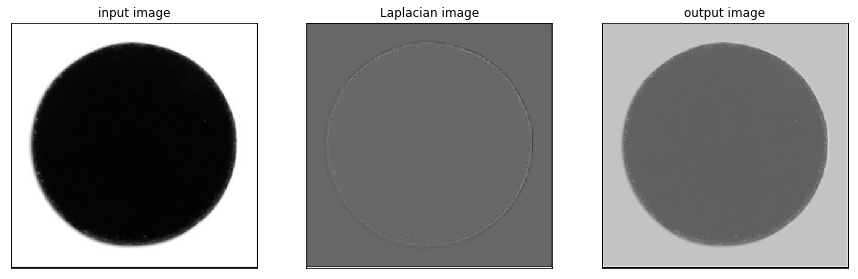

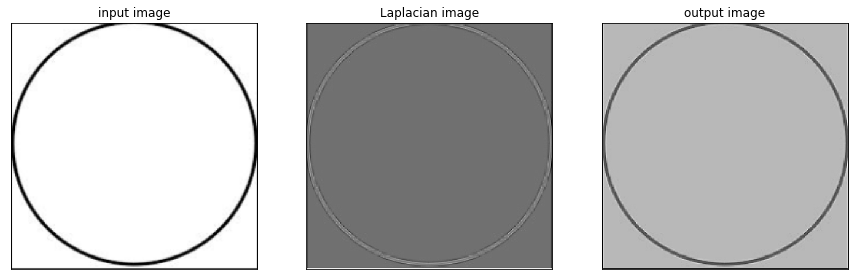

In [22]:
def ideal_filter(img, d_0=30, mode='lowpass'):
    if mode == 'highpass':
        filter_show(img, filter=lambda r: 1 if r > d_0 else 0)
    elif mode == 'lowpass':
        filter_show(img, filter=lambda r: 1 if r < d_0 else 0)

def butterworth_filter(img, d_0=30, mode='lowpass'):
    b, a = signal.butter(4, Wn=d_0, btype=mode, analog=True)
    filter = lambda dist: signal.freqs(b, a, worN=[dist])[1][0]
    filter_show(img, filter=filter)

def gaussian_filter(img, d_0=30, mode='lowpass'):
    gaussian_function = lambda r : np.exp((-r ** 2 / (2 * d_0)))
    if mode == 'highpass':
        filter_show(img, filter=lambda r: 1 - gaussian_function)
    elif mode == 'lowpass':
        filter_show(img, filter=lambda r: gaussian_filter)

def laplacian_filter(img):
    laplacian_img = cv2.Laplacian(img, cv2.CV_64F)
    fig, axes = plt.subplots(nrows=1, ncols=3, squeeze=False, figsize=(15, 15))
    show_img(img, axes[0, 0], "input image", lambda x: x)
    show_img(laplacian_img, axes[0, 1], "Laplacian image", lambda x: x)
    show_img(img - laplacian_img, axes[0, 2], "output image", lambda x: x)
    
    
modes = ['lowpass', 'highpass']
params = [30, 60]

# realce con filtro laplaciano
print("Filtro laplaciano en imagenes sinteticas")
for file in syntetic_images_paths:
    img = cv2.imread(file, 0)
    laplacian_filter(img)

Filtro laplaciano en imagenes reales


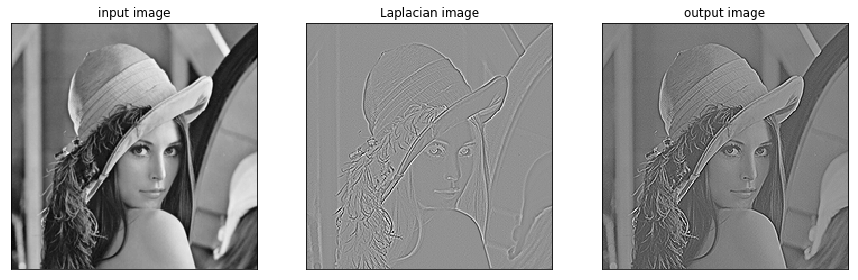

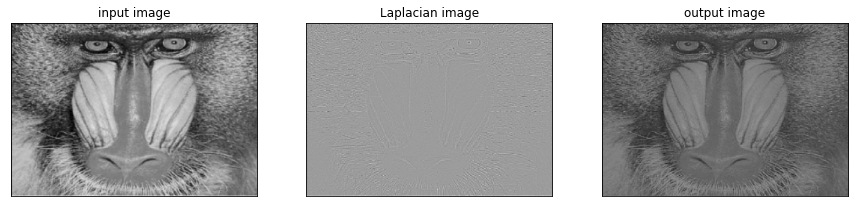

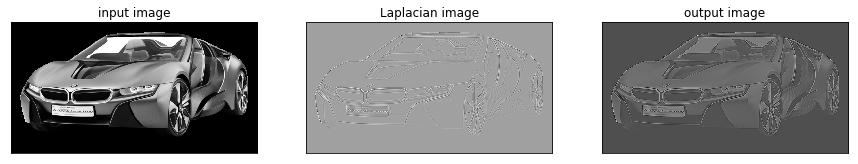

In [26]:
print("Filtro laplaciano en imagenes reales")    
for file in real_images_paths:
    img = cv2.imread(file, 0)
    laplacian_filter(img)

Filtro ideal: lowpass


/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


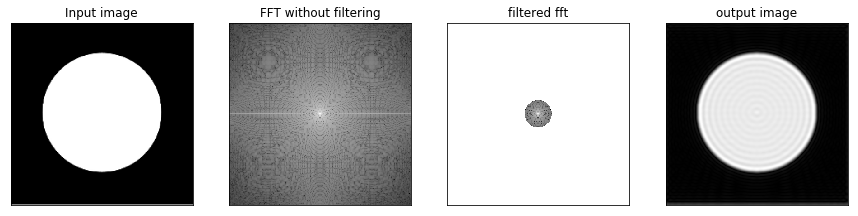

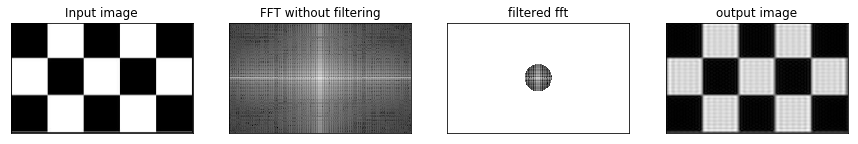

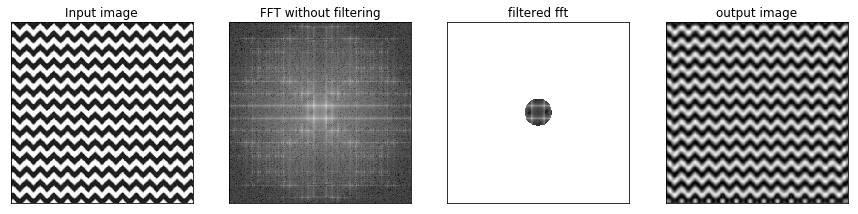

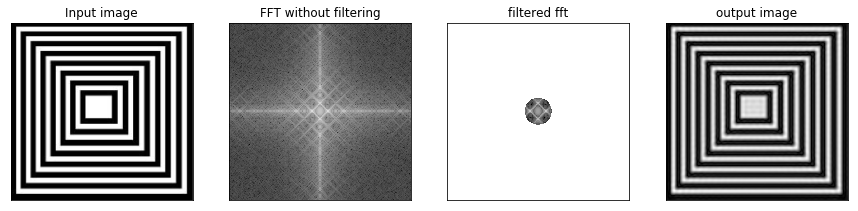

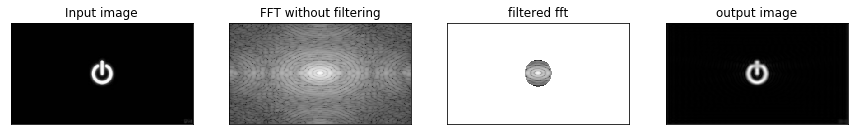

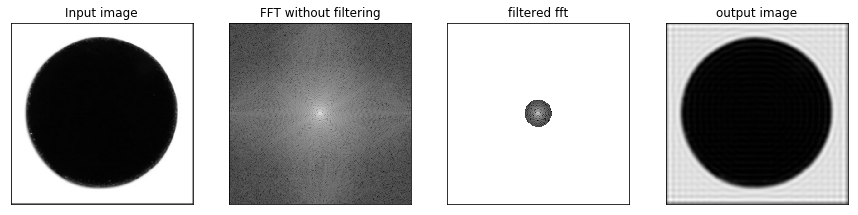

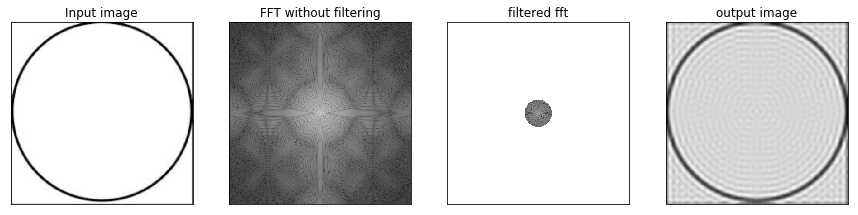

Filtro ideal: highpass


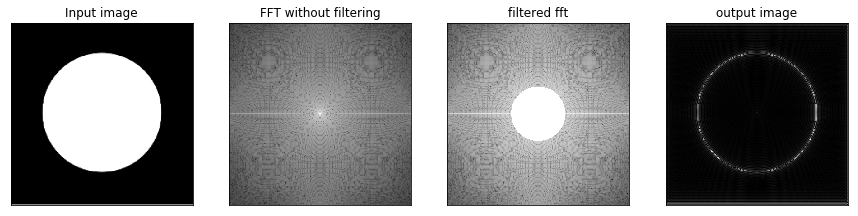

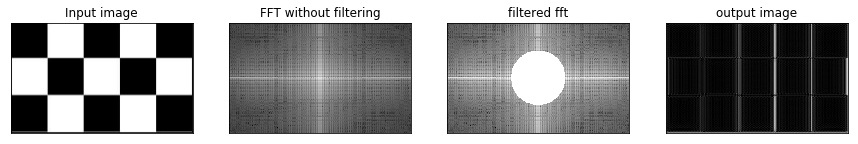

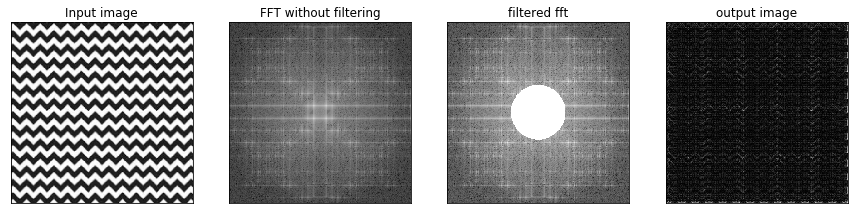

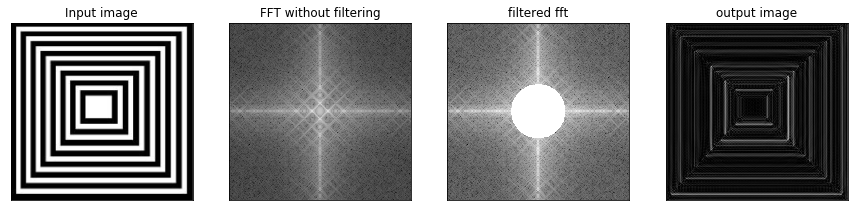

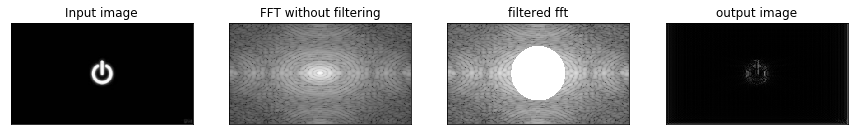

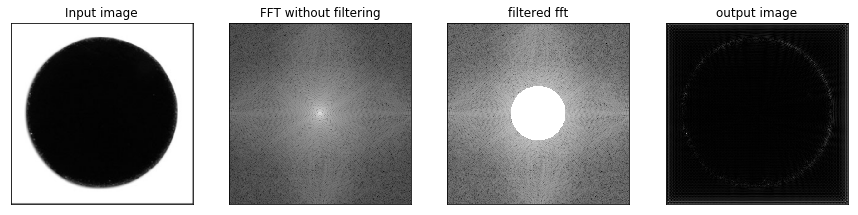

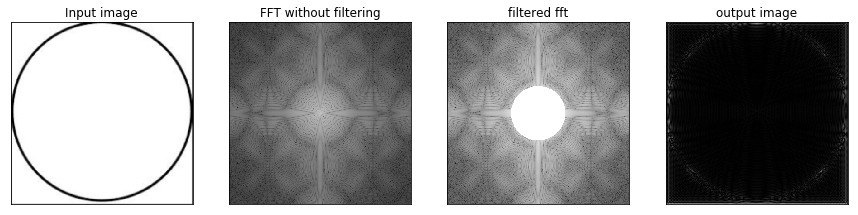

Filtro ideal: bandpass


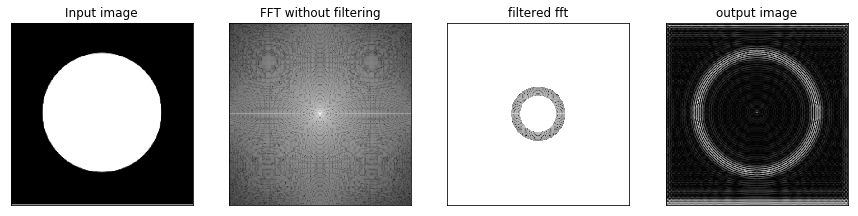

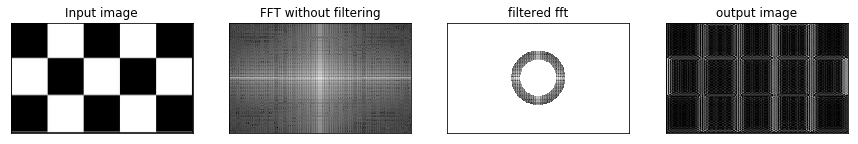

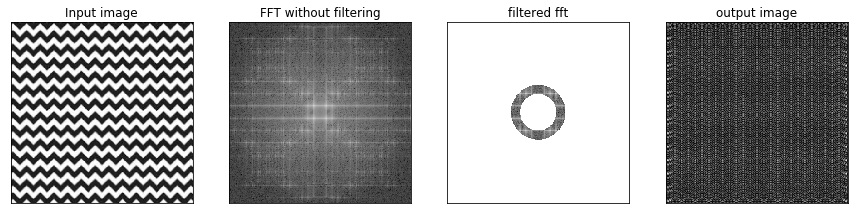

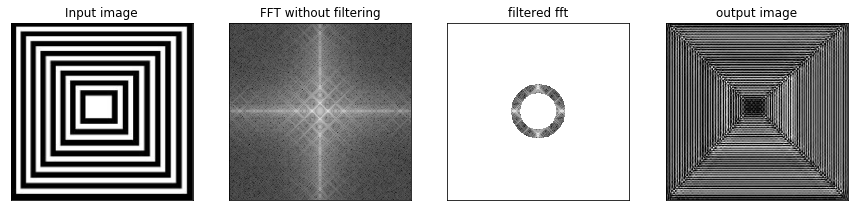

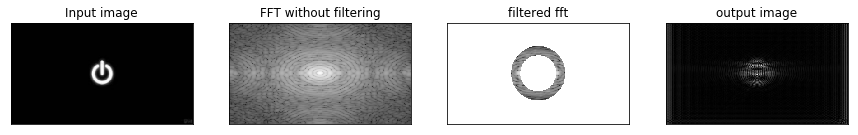

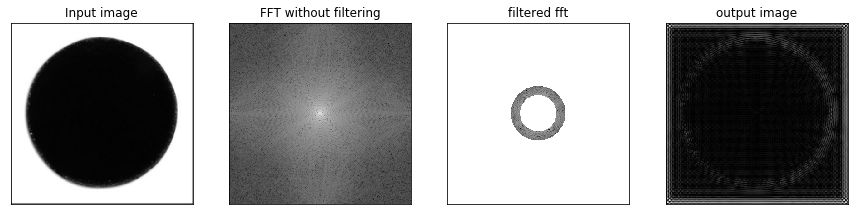

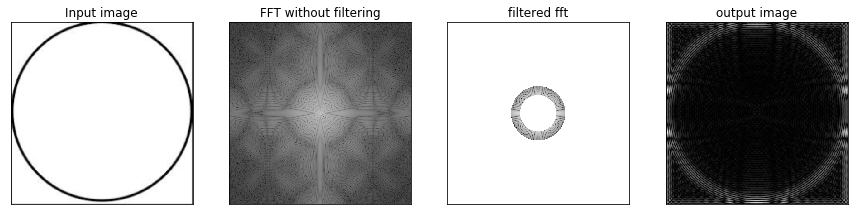

In [27]:
for mode, d_0 in zip(modes, params):
    print("Filtro ideal: %s" % (mode))
    for file in syntetic_images_paths:
        img = cv2.imread(file, 0)
        ideal_filter(img, d_0=d_0, mode=mode)